In [1]:
# Imports:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
# Define excel path

excelPaths = pathlib.Path('/Users/andrew/Library/CloudStorage/OneDrive-UCB-O365/research/presentations/update_slides')
excelPath = excelPaths.joinpath('2023C3_NEXAFS_summary.xlsx')
outPath = pathlib.Path('/Users/andrew/Library/CloudStorage/OneDrive-UCB-O365/research/data_analysis/rsoxs_suite/nexafs_plots/2023C3/bar_plot_tilt_summaries')

In [228]:
# Function to determine the color and alpha based on tilt angle and quality
def get_bar_properties(tilt_angle, quality):
    # Determine the color
    color = 'red' if tilt_angle <= 55 else 'blue'
    
    # Determine the alpha (opacity)
    alpha = quality / 5.0  # Since 5 is the highest quality
    
    return color, alpha

In [229]:
df = pd.read_excel(excelPath)
display(df)

,Carbon NEXAFS,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Sample Name,RSoXS Chamber TRMSN,NaN,RSoXS Chamber TEY,NaN,NEXAFS Chamber TEY,NaN,NEXAFS Chamber PEY,NaN,NEXAFS Chamber FY,NaN
1,NaN,Tilt Angle (α) [°],Quality (0-5),Tilt Angle (α) [°],Quality (0-5),Tilt Angle (α) [°],Quality (0-5),Tilt Angle (α) [°],Quality (0-5),Tilt Angle (α) [°],Quality (0-5)
2,Y6 CB 2000,49,3,50,5,NaN,NaN,NaN,NaN,NaN,NaN
3,Y6 CB 2500,54,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Y6 CB 3000,51,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Y6 CBCN,47,1,41,2,NaN,NaN,NaN,NaN,NaN,NaN
6,Y6 CF 2000,34,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Y6 CF 2500,31,4,30,5,NaN,NaN,NaN,NaN,NaN,NaN
8,Y6 CFCN,36,4,44,4,NaN,NaN,NaN,NaN,NaN,NaN
9,Y6BO CB 2500,31,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [230]:
# Modify the list comprehension for new_columns
new_columns = []
for i in range(df.shape[1]):
    if str(df.iloc[0, i]) == 'nan':
        # When it's nan, repeat the last non-nan value (if there is one)
        new_columns.append(str(df.iloc[0, i-1]) + ' ' + str(df.iloc[1, i]))
    elif str(df.iloc[0,i]) == 'Sample Name':
        new_columns.append(str(df.iloc[0,i]))
    else:
        new_columns.append(str(df.iloc[0, i]) + ' ' + str(df.iloc[1, i]))

# Assign the new column names
df.columns = new_columns

# Drop the two rows you used for the column names
df = df.drop([0, 1]).reset_index(drop=True)

display(df)
# new_columns

,Sample Name,RSoXS Chamber TRMSN Tilt Angle (α) [°],RSoXS Chamber TRMSN Quality (0-5),RSoXS Chamber TEY Tilt Angle (α) [°],RSoXS Chamber TEY Quality (0-5),NEXAFS Chamber TEY Tilt Angle (α) [°],NEXAFS Chamber TEY Quality (0-5),NEXAFS Chamber PEY Tilt Angle (α) [°],NEXAFS Chamber PEY Quality (0-5),NEXAFS Chamber FY Tilt Angle (α) [°],NEXAFS Chamber FY Quality (0-5)
0,Y6 CB 2000,49,3,50,5,NaN,NaN,NaN,NaN,NaN,NaN
1,Y6 CB 2500,54,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Y6 CB 3000,51,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Y6 CBCN,47,1,41,2,NaN,NaN,NaN,NaN,NaN,NaN
4,Y6 CF 2000,34,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Y6 CF 2500,31,4,30,5,NaN,NaN,NaN,NaN,NaN,NaN
6,Y6 CFCN,36,4,44,4,NaN,NaN,NaN,NaN,NaN,NaN
7,Y6BO CB 2500,31,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Y6BO CB 3000,34,4,33,4,NaN,NaN,NaN,NaN,NaN,NaN
9,Y6BO CBCN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [231]:
condition = ~(df['RSoXS Chamber TEY Quality (0-5)'].isna() & 
              df['NEXAFS Chamber TEY Quality (0-5)'].isna() & 
              df['NEXAFS Chamber PEY Quality (0-5)'].isna() & 
             df['NEXAFS Chamber FY Quality (0-5)'].isna())
condition

df_filtered = df[condition]
df_filtered

,Sample Name,RSoXS Chamber TRMSN Tilt Angle (α) [°],RSoXS Chamber TRMSN Quality (0-5),RSoXS Chamber TEY Tilt Angle (α) [°],RSoXS Chamber TEY Quality (0-5),NEXAFS Chamber TEY Tilt Angle (α) [°],NEXAFS Chamber TEY Quality (0-5),NEXAFS Chamber PEY Tilt Angle (α) [°],NEXAFS Chamber PEY Quality (0-5),NEXAFS Chamber FY Tilt Angle (α) [°],NEXAFS Chamber FY Quality (0-5)
0,Y6 CB 2000,49,3,50,5,NaN,NaN,NaN,NaN,NaN,NaN
3,Y6 CBCN,47,1,41,2,NaN,NaN,NaN,NaN,NaN,NaN
5,Y6 CF 2500,31,4,30,5,NaN,NaN,NaN,NaN,NaN,NaN
6,Y6 CFCN,36,4,44,4,NaN,NaN,NaN,NaN,NaN,NaN
8,Y6BO CB 3000,34,4,33,4,NaN,NaN,NaN,NaN,NaN,NaN
10,Y6BO CF 2500,28,5,32,5,NaN,NaN,NaN,NaN,NaN,NaN
12,Y7 CB 2000,NaN,0,33,4,27,5,25,5,NaN,0
13,Y7 CBCN,NaN,0,NaN,NaN,49,2,44,4,NaN,0
16,Y7 CF 3000,37,3,30,2,NaN,NaN,NaN,NaN,NaN,NaN
17,Y7 CFCN,NaN,0,46,4,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
df_groups = [[0, 3, 5, 6],
             [8, 10],
             [12, 13, 16, 17],
             [20, 24], 
             [26, 27, 28, 29],
             [30, 31, 32, 33], 
             [34, 35, 36, 37],
             [38, 39, 40, 41],
             [42, 43, 44, 45]]

for grouping in df_groups:
    df_group = df_filtered.loc[grouping]
    display(df_group)

,Sample Name,RSoXS Chamber TRMSN Tilt Angle (α) [°],RSoXS Chamber TRMSN Quality (0-5),RSoXS Chamber TEY Tilt Angle (α) [°],RSoXS Chamber TEY Quality (0-5),NEXAFS Chamber TEY Tilt Angle (α) [°],NEXAFS Chamber TEY Quality (0-5),NEXAFS Chamber PEY Tilt Angle (α) [°],NEXAFS Chamber PEY Quality (0-5),NEXAFS Chamber FY Tilt Angle (α) [°],NEXAFS Chamber FY Quality (0-5)
0,Y6 CB 2000,49,3,50,5,NaN,NaN,NaN,NaN,NaN,NaN
3,Y6 CBCN,47,1,41,2,NaN,NaN,NaN,NaN,NaN,NaN
5,Y6 CF 2500,31,4,30,5,NaN,NaN,NaN,NaN,NaN,NaN
6,Y6 CFCN,36,4,44,4,NaN,NaN,NaN,NaN,NaN,NaN


,Sample Name,RSoXS Chamber TRMSN Tilt Angle (α) [°],RSoXS Chamber TRMSN Quality (0-5),RSoXS Chamber TEY Tilt Angle (α) [°],RSoXS Chamber TEY Quality (0-5),NEXAFS Chamber TEY Tilt Angle (α) [°],NEXAFS Chamber TEY Quality (0-5),NEXAFS Chamber PEY Tilt Angle (α) [°],NEXAFS Chamber PEY Quality (0-5),NEXAFS Chamber FY Tilt Angle (α) [°],NEXAFS Chamber FY Quality (0-5)
8,Y6BO CB 3000,34,4,33,4,NaN,NaN,NaN,NaN,NaN,NaN
10,Y6BO CF 2500,28,5,32,5,NaN,NaN,NaN,NaN,NaN,NaN


,Sample Name,RSoXS Chamber TRMSN Tilt Angle (α) [°],RSoXS Chamber TRMSN Quality (0-5),RSoXS Chamber TEY Tilt Angle (α) [°],RSoXS Chamber TEY Quality (0-5),NEXAFS Chamber TEY Tilt Angle (α) [°],NEXAFS Chamber TEY Quality (0-5),NEXAFS Chamber PEY Tilt Angle (α) [°],NEXAFS Chamber PEY Quality (0-5),NEXAFS Chamber FY Tilt Angle (α) [°],NEXAFS Chamber FY Quality (0-5)
12,Y7 CB 2000,NaN,0,33,4,27,5,25,5,NaN,0
13,Y7 CBCN,NaN,0,NaN,NaN,49,2,44,4,NaN,0
16,Y7 CF 3000,37,3,30,2,NaN,NaN,NaN,NaN,NaN,NaN
17,Y7 CFCN,NaN,0,46,4,NaN,NaN,NaN,NaN,NaN,NaN


,Sample Name,RSoXS Chamber TRMSN Tilt Angle (α) [°],RSoXS Chamber TRMSN Quality (0-5),RSoXS Chamber TEY Tilt Angle (α) [°],RSoXS Chamber TEY Quality (0-5),NEXAFS Chamber TEY Tilt Angle (α) [°],NEXAFS Chamber TEY Quality (0-5),NEXAFS Chamber PEY Tilt Angle (α) [°],NEXAFS Chamber PEY Quality (0-5),NEXAFS Chamber FY Tilt Angle (α) [°],NEXAFS Chamber FY Quality (0-5)
20,Y7BO CB 3000,20,4,30,5,NaN,NaN,NaN,NaN,NaN,NaN
24,Y7BO CF 3000,22,4,33,4,NaN,NaN,NaN,NaN,NaN,NaN


,Sample Name,RSoXS Chamber TRMSN Tilt Angle (α) [°],RSoXS Chamber TRMSN Quality (0-5),RSoXS Chamber TEY Tilt Angle (α) [°],RSoXS Chamber TEY Quality (0-5),NEXAFS Chamber TEY Tilt Angle (α) [°],NEXAFS Chamber TEY Quality (0-5),NEXAFS Chamber PEY Tilt Angle (α) [°],NEXAFS Chamber PEY Quality (0-5),NEXAFS Chamber FY Tilt Angle (α) [°],NEXAFS Chamber FY Quality (0-5)
26,PM6 CB 3000,54,4,64,4,NaN,NaN,NaN,NaN,NaN,NaN
27,PM6 CBCN,33,4,59,5,NaN,NaN,NaN,NaN,NaN,NaN
28,PM6 CF 3000,54,4,60,4,NaN,NaN,NaN,NaN,NaN,NaN
29,PM6 CFCN,33,4,62,4,NaN,NaN,NaN,NaN,NaN,NaN


,Sample Name,RSoXS Chamber TRMSN Tilt Angle (α) [°],RSoXS Chamber TRMSN Quality (0-5),RSoXS Chamber TEY Tilt Angle (α) [°],RSoXS Chamber TEY Quality (0-5),NEXAFS Chamber TEY Tilt Angle (α) [°],NEXAFS Chamber TEY Quality (0-5),NEXAFS Chamber PEY Tilt Angle (α) [°],NEXAFS Chamber PEY Quality (0-5),NEXAFS Chamber FY Tilt Angle (α) [°],NEXAFS Chamber FY Quality (0-5)
30,PM6:Y6 CB,48,4,60,5,NaN,NaN,NaN,NaN,NaN,NaN
31,PM6:Y6 CBCN,NaN,0,NaN,NaN,64,5,66,5,51,2
32,PM6:Y6 CF,41,3,NaN,NaN,54.5,5,60,5,40,3
33,PM6:Y6 CFCN,36,4,NaN,NaN,62,5,64,5,42,3


,Sample Name,RSoXS Chamber TRMSN Tilt Angle (α) [°],RSoXS Chamber TRMSN Quality (0-5),RSoXS Chamber TEY Tilt Angle (α) [°],RSoXS Chamber TEY Quality (0-5),NEXAFS Chamber TEY Tilt Angle (α) [°],NEXAFS Chamber TEY Quality (0-5),NEXAFS Chamber PEY Tilt Angle (α) [°],NEXAFS Chamber PEY Quality (0-5),NEXAFS Chamber FY Tilt Angle (α) [°],NEXAFS Chamber FY Quality (0-5)
34,PM6:Y6BO CB,40,4,NaN,NaN,64,5,68,5,42,3
35,PM6:Y6BO CBCN,NaN,NaN,NaN,NaN,64,5,66,5,47,2
36,PM6:Y6BO CF,43,4,NaN,NaN,60,5,63,5,44,3
37,PM6:Y6BO CFCN,36,2,NaN,NaN,64,5,67,5,45,3


,Sample Name,RSoXS Chamber TRMSN Tilt Angle (α) [°],RSoXS Chamber TRMSN Quality (0-5),RSoXS Chamber TEY Tilt Angle (α) [°],RSoXS Chamber TEY Quality (0-5),NEXAFS Chamber TEY Tilt Angle (α) [°],NEXAFS Chamber TEY Quality (0-5),NEXAFS Chamber PEY Tilt Angle (α) [°],NEXAFS Chamber PEY Quality (0-5),NEXAFS Chamber FY Tilt Angle (α) [°],NEXAFS Chamber FY Quality (0-5)
38,PM6:Y7 CB,35,3,NaN,NaN,61,5,65,5,43,3
39,PM6:Y7 CBCN,30,4,NaN,NaN,62,5,64,5,42,2
40,PM6:Y7 CF,44,4,NaN,NaN,54,5,57,5,44,3
41,PM6:Y7 CFCN,37,4,NaN,NaN,60,5,62,5,43,3


,Sample Name,RSoXS Chamber TRMSN Tilt Angle (α) [°],RSoXS Chamber TRMSN Quality (0-5),RSoXS Chamber TEY Tilt Angle (α) [°],RSoXS Chamber TEY Quality (0-5),NEXAFS Chamber TEY Tilt Angle (α) [°],NEXAFS Chamber TEY Quality (0-5),NEXAFS Chamber PEY Tilt Angle (α) [°],NEXAFS Chamber PEY Quality (0-5),NEXAFS Chamber FY Tilt Angle (α) [°],NEXAFS Chamber FY Quality (0-5)
42,PM6:Y7BO CB,33,2,NaN,NaN,60,5,64,5,41,3
43,PM6:Y7BO CBCN,41,3,NaN,NaN,68,5,68,5,53,3
44,PM6:Y7BO CF,41,2,NaN,NaN,54,5,58,5,41,3
45,PM6:Y7BO CFCN,48,3,NaN,NaN,66,5,67,5,48,3


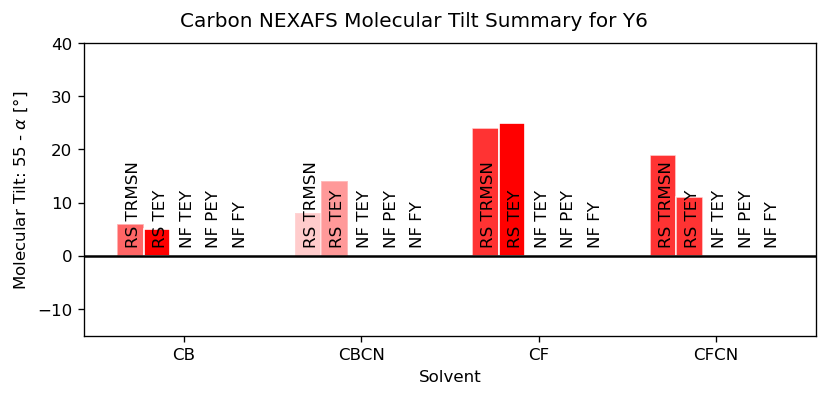

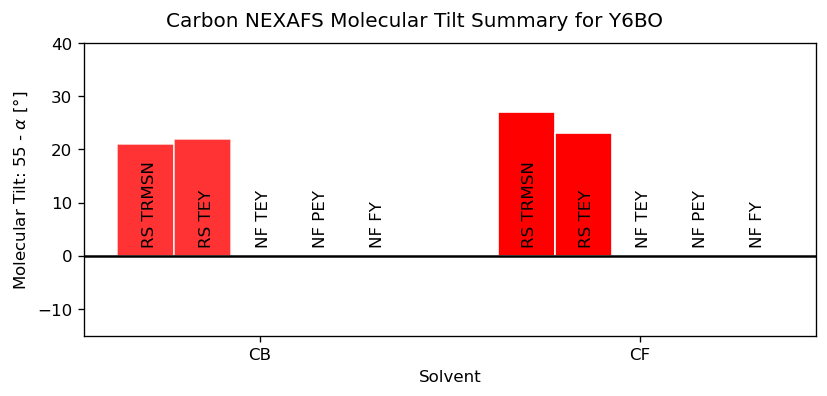

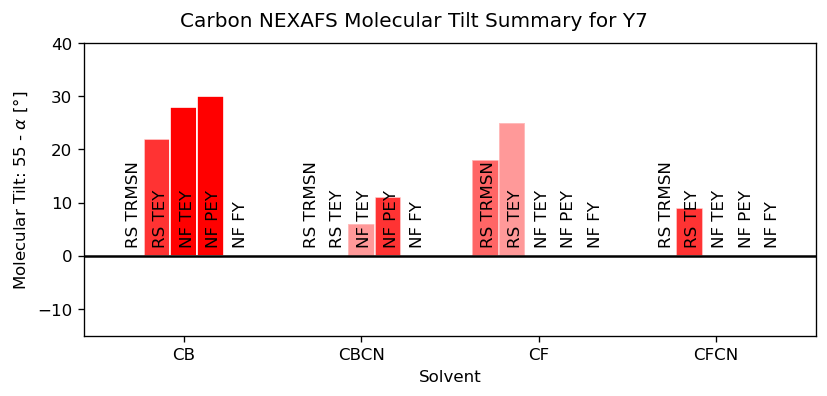

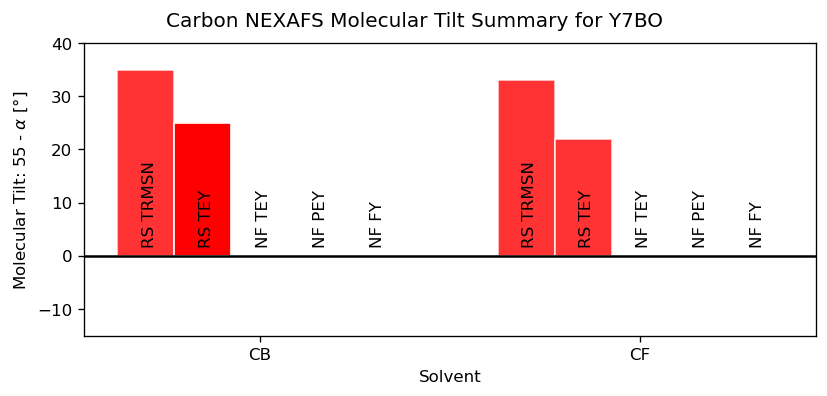

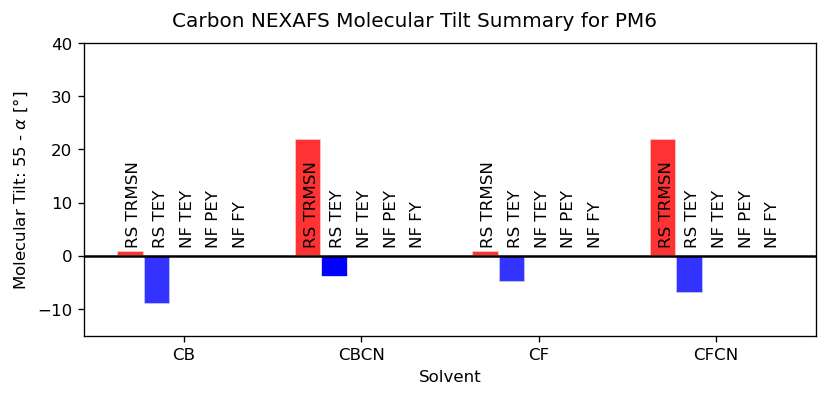

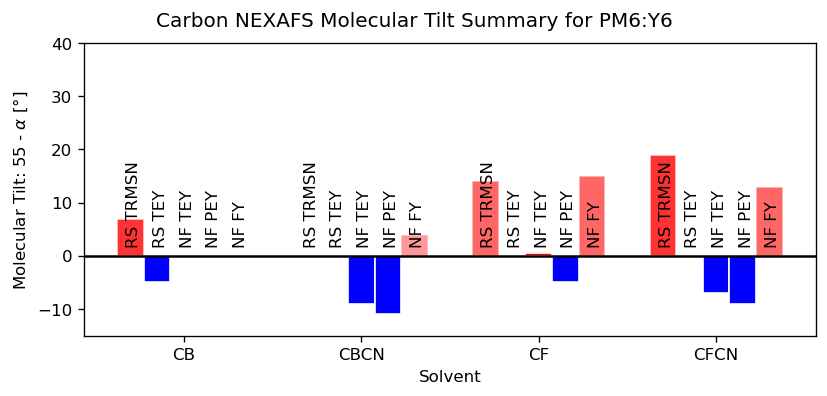

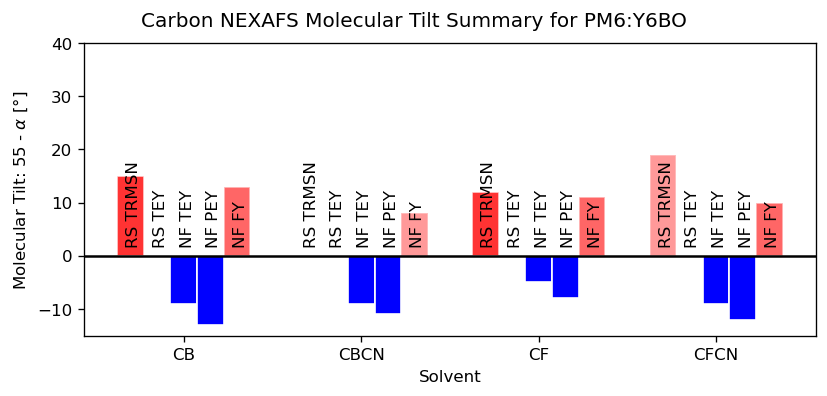

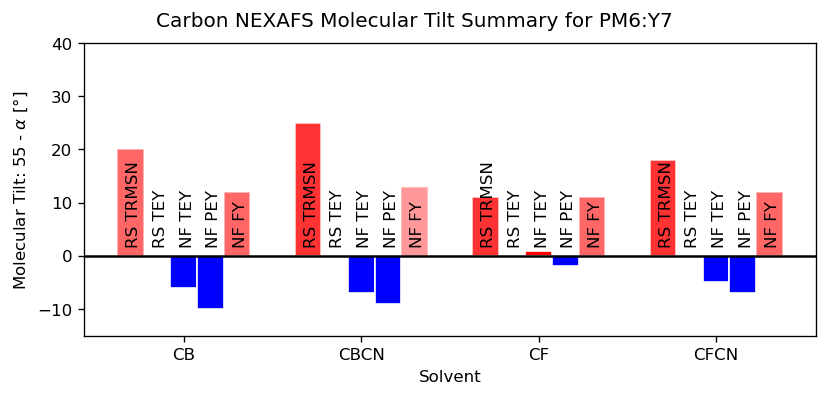

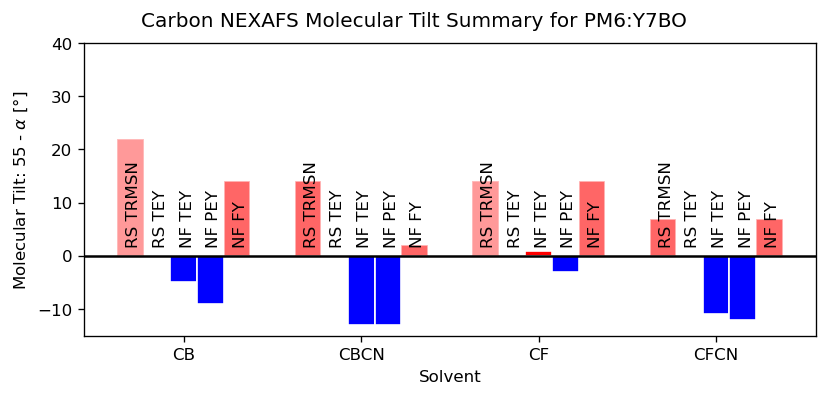

In [260]:
for grouping in df_groups:
    df_group = df_filtered.loc[grouping]
    composition = df_group['Sample Name'].iloc[0].split(' ')[0]
    solvents = []
    for sample_name in df_group['Sample Name']:
        solvent = sample_name.split(' ')[1]
        solvents.append(solvent)
        
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(7, 3.5))
    fig.set(tight_layout=True, dpi=120)
    fig.suptitle(f'Carbon NEXAFS Molecular Tilt Summary for {composition}', y=0.93)

    # Bar width and positions
    bar_width = 0.15
    ind = np.arange(len(df_group))  # Indexes for sample names

    measurements = [
        ('RSoXS Chamber TRMSN Tilt Angle (α) [°]', 'RSoXS Chamber TRMSN Quality (0-5)'),
        ('RSoXS Chamber TEY Tilt Angle (α) [°]', 'RSoXS Chamber TEY Quality (0-5)'),
        ('NEXAFS Chamber TEY Tilt Angle (α) [°]', 'NEXAFS Chamber TEY Quality (0-5)'),
        ('NEXAFS Chamber PEY Tilt Angle (α) [°]', 'NEXAFS Chamber PEY Quality (0-5)'),
        ('NEXAFS Chamber FY Tilt Angle (α) [°]', 'NEXAFS Chamber FY Quality (0-5)')
    ]

    annotation_key = {'RSoXS Chamber TRMSN Tilt Angle (α) [°]': 'RS TRMSN',
                      'RSoXS Chamber TEY Tilt Angle (α) [°]': 'RS TEY', 
                      'NEXAFS Chamber TEY Tilt Angle (α) [°]': 'NF TEY', 
                      'NEXAFS Chamber PEY Tilt Angle (α) [°]': 'NF PEY', 
                      'NEXAFS Chamber FY Tilt Angle (α) [°]': 'NF FY'}

    # Iterate over each measurement
    for i, (angle_col, quality_col) in enumerate(measurements):
        # List to store bar properties
        heights = []
        colors = []
        alphas = []

        for index, row in df_group.iterrows():
            tilt_angle = row[angle_col]
            # print(tilt_angle)
            quality = row[quality_col]

            if np.isnan(tilt_angle) or quality == 0:
                heights.append(0)
                colors.append('white')
                alphas.append(0)
            else:
                color, alpha = get_bar_properties(tilt_angle, quality)
                height = 55 - tilt_angle

                heights.append(height)
                colors.append(color)
                alphas.append(alpha)

        # Plot the bars for this measurement
        for sample_index, (height, color, alpha) in enumerate(zip(heights, colors, alphas)):
            ax.bar(sample_index + i*bar_width, height, bar_width, color=color, alpha=alpha, edgecolor="white", linewidth=1)
            # ax.annotate(' '.join(angle_col.split(' ')[0:3]), 
            ax.annotate(annotation_key[angle_col], 
                        xy=(sample_index + i*bar_width, 0), 
                        xytext=(2,5), 
                        textcoords="offset points", 
                        ha='center', va='bottom', 
                        rotation=90)        

    # Position the x-axis at y=0 which corresponds to 55 degrees in our plot
    ax.axhline(0, color='black')  # Adds the x-axis at the value of 55

    # Set x-ticks to be the sample names, adjusting position to center them amongst the bars
    ax.set_xticks(ind + bar_width*2)
    # ax.set_xticklabels(df_group['Sample Name'], rotation=45, ha="right")
    # ax.set_xticklabels(solvents, rotation=0, ha="right")
    ax.set_xticklabels(solvents)



    # Optional: You can also set the y-tick labels to indicate the actual tilt angles
    # current_y_ticks = ax.get_yticks()
    # ax.set_yticklabels([int(55 + y_val) for y_val in current_y_ticks])

    ax.set(ylabel=r'Molecular Tilt: 55 - $\alpha$ [°]', ylim=(-15, 40), xlabel='Solvent')
    plt.savefig(outPath.joinpath('carbon', f'{composition}_carbon_nexafs_summary.png'), dpi=150)

    plt.show()
    # fname = f'{composition}_carbon_nexafs_summary'
    plt.close('all')

/var/folders/m1/v62q73kx1ylgb2vpydrxbyy40000gn/T/ipykernel_27057/3173418288.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(55 + y_val) for y_val in current_y_ticks])


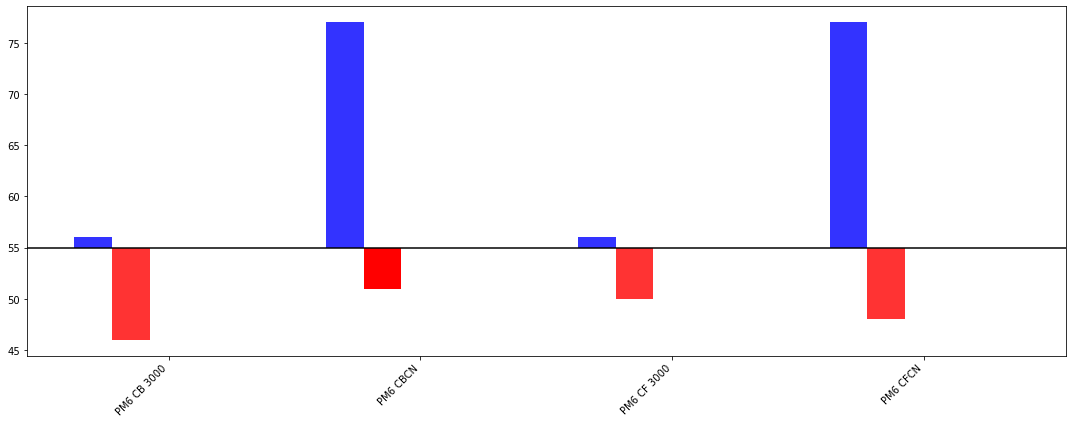

In [90]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Bar width and positions
bar_width = 0.15
ind = np.arange(len(df_to_plot))  # Indexes for sample names

measurements = [
    ('Transmission Tilt Angle (α) [°]', 'Transmission Quality (0-5)'),
    ('RSoXS Chamber TEY Tilt Angle (α) [°]', 'RSoXS Chamber TEY Quality (0-5)'),
    ('NEXAFS Chamber TEY Tilt Angle (α) [°]', 'NEXAFS Chamber TEY Quality (0-5)'),
    ('NEXAFS Chamber PEY Tilt Angle (α) [°]', 'NEXAFS Chamber PEY Quality (0-5)'),
    ('NEXAFS Chamber FY Tilt Angle (α) [°]', 'NEXAFS Chamber FY Quality (0-5)')
]


# Iterate over each measurement
for i, (angle_col, quality_col) in enumerate(measurements):
    # List to store bar properties
    heights = []
    colors = []
    alphas = []
    
    for index, row in df_to_plot.iterrows():
        tilt_angle = row[angle_col]
        quality = row[quality_col]
        
        if np.isnan(tilt_angle) or quality == 0:
            heights.append(0)
            colors.append('white')
            alphas.append(0)
        else:
            color, alpha = get_bar_properties(tilt_angle, quality)
            height = 55 - tilt_angle
            
            heights.append(height)
            colors.append(color)
            alphas.append(alpha)
    
    # Plot the bars for this measurement
    # ax.bar(ind + i*bar_width, heights, bar_width, color=colors, alpha=alpha)
    for sample_index, (height, color, alpha) in enumerate(zip(heights, colors, alphas)):
        ax.bar(sample_index + i*bar_width, height, bar_width, color=color, alpha=alpha)

# Position the x-axis at y=0 which corresponds to 55 degrees in our plot
ax.axhline(0, color='black')  # Adds the x-axis at the value of 55

# Set x-ticks to be the sample names, adjusting position to center them amongst the bars
ax.set_xticks(ind + bar_width*2)
ax.set_xticklabels(df_to_plot['Sample Name'], rotation=45, ha="right")

# Optional: You can also set the y-tick labels to indicate the actual tilt angles
current_y_ticks = ax.get_yticks()
ax.set_yticklabels([int(55 + y_val) for y_val in current_y_ticks])

plt.tight_layout()
plt.show()


ValueError: alpha (nan) is outside 0-1 range

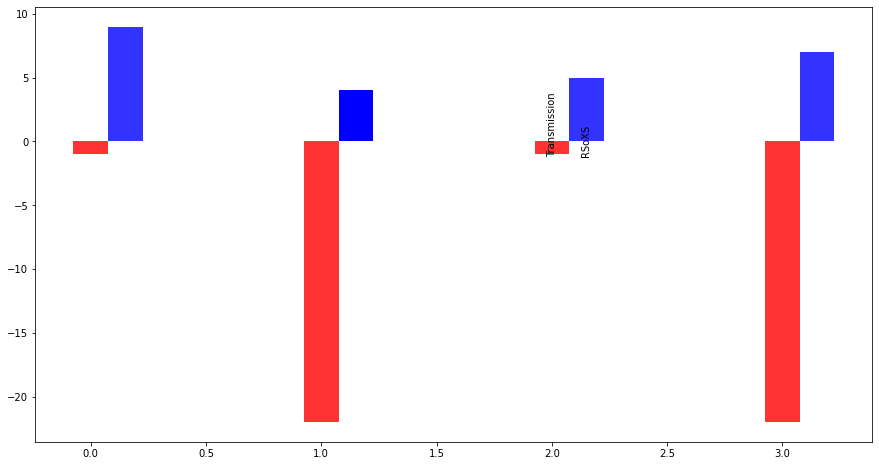

In [91]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# These are the measurements columns we're interested in
measurements = [
    ('Transmission Tilt Angle (α) [°]', 'Transmission Quality (0-5)'),
    ('RSoXS Chamber TEY Tilt Angle (α) [°]', 'RSoXS Chamber TEY Quality (0-5)'),
    ('NEXAFS Chamber TEY Tilt Angle (α) [°]', 'NEXAFS Chamber TEY Quality (0-5)'),
    ('NEXAFS Chamber PEY Tilt Angle (α) [°]', 'NEXAFS Chamber PEY Quality (0-5)'),
    ('NEXAFS Chamber FY Tilt Angle (α) [°]', 'NEXAFS Chamber FY Quality (0-5)')
]

bar_width = 0.15  # Adjust as needed for the number of measurements
x = np.arange(len(df_to_plot['Sample Name']))

for i, (angle_col, quality_col) in enumerate(measurements):
    # Calculate bar heights
    heights = df_to_plot[angle_col] - 55
    # Assign colors and opacities based on the conditions
    colors = ['blue' if h >= 0 else 'red' for h in heights]
    alphas = df_to_plot[quality_col] / 5.0  # Convert quality to alpha (0 to 1)
    
    # Plot the bars for this measurement
    for sample_index, (height, color, alpha) in enumerate(zip(heights, colors, alphas)):
        ax.bar(sample_index + i*bar_width, height, bar_width, color=color, alpha=alpha)
        # Add annotations for the measurements
        if sample_index == len(df_to_plot['Sample Name']) // 2:  # Roughly in the middle
            ax.annotate(angle_col.split(' ')[0], 
                        xy=(sample_index + i*bar_width, 0), 
                        xytext=(0,-15), 
                        textcoords="offset points", 
                        ha='center', va='bottom', 
                        rotation=90)

# Setting the xticks for sample names
ax.set_xticks(x + 2*bar_width)  # Adjust the 2* based on how many measurements there are / 2
ax.set_xticklabels(df_to_plot['Sample Name'].tolist(), rotation=45, ha='right')

# Set y-ticks
current_y_ticks = ax.get_yticks()
ax.set_yticks(current_y_ticks)
ax.set_yticklabels([int(55 + y_val) for y_val in current_y_ticks])

plt.tight_layout()
plt.show()
